# Análisis temporal

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import inline as inline

%matplotlib inline

pd.set_option('display.width', 400)
pd.set_option('display.max_columns', 23)
pd.set_option('display.max_rows', 200)

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

df = pd.read_csv('events.csv')
pd.options.mode.chained_assignment = None

/home/carito/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Analizo el rango temporal de la columna "timestamp"

In [2]:
df["timestamp"].min()

'2018-01-01 07:32:26'

In [3]:
df["timestamp"].max()

'2018-06-15 23:59:31'

# Cantidad de visitas a lo largo del tiempo

Para la cantidad de visitas, se computarán todos los eventos "visited site" por usuario y por día, de forma tal que si un día el usuario no presenta el evento de visita pero se registró algún otro eevento, este caso también se compute como una visita.

In [4]:
df_visitas =  df[['timestamp','person','event']]
df_visitas['timestamp'] = pd.to_datetime(df_visitas['timestamp'])
df_visitas = df_visitas.sort_values(by=["timestamp"])
df_visitas['just_date'] = df_visitas['timestamp'].dt.date

In [5]:
def visited (row):
   if row['event'] == 'visited site':
      return 1
   return 0

In [6]:
df_visitas["visitas"] = df.apply(lambda row: visited (row),axis=1)
visitas_por_persona_por_dia = df_visitas.groupby(["person","just_date"]).agg({'visitas':'sum'})
visitas_por_persona_por_dia["visitas"]=visitas_por_persona_por_dia["visitas"].replace(0,1)

In [7]:
visitas_por_persona_por_dia.head(50)

visitas
person   just_date          
0004b0a2 2018-05-31        1
0006a21a 2018-05-29        1
000a54b2 2018-04-09        1
         2018-05-24        1
00184bf9 2018-04-06        1
         2018-05-04        1
         2018-05-17        1
0019c395 2018-05-17        1
001bb7eb 2018-06-06        1
         2018-06-08        1
001f1653 2018-05-29        1
00204059 2018-01-18        1
         2018-01-31        1
         2018-02-01        1
         2018-02-02        1
         2018-02-06        1
         2018-02-08        1
         2018-02-14        1
         2018-02-15        3
         2018-02-16        1
         2018-03-20        1
         2018-05-19        1
0020f73c 2018-06-12        1
0024a82b 2018-05-30        1
0024ad28 2018-05-21        1
         2018-05-24        1
         2018-05-28        1
00269e77 2018-05-14        1
         2018-06-05        1
         2018-06-07        2
0026fd72 2018-06-14        2
0027c344 2018-06-05        1
         2018-06-12        2
00283a9e 2018-06-02        1
         2018-06-15        1
002932b1 2018-05-03        1
         2018-05-29        1
         2018-05-30        2
002cecfa 2018-05-16        1
002f3084 2018-06-09        1
00300ace 2018-05-28        2
00344c0a 2018-06-13        1
003857f6 2018-04-06        1
         2018-05-10        1
         2018-05-11        2
         2018-05-14        1
         2018-06-06        1
         2018-06-07        1
003f561a 2018-06-06        2
003ff6cd 2018-05-16        1

In [8]:
visitas_por_dia = visitas_por_persona_por_dia.groupby(['just_date']).agg({'visitas':'sum'})

In [9]:
visitas_por_dia.head(50)

,visitas
just_date,
2018-01-01,8
2018-01-02,22
2018-01-03,32
2018-01-04,37
2018-01-05,49
2018-01-06,30
2018-01-07,39
2018-01-08,51
2018-01-09,66


<Figure size 432x288 with 0 Axes>

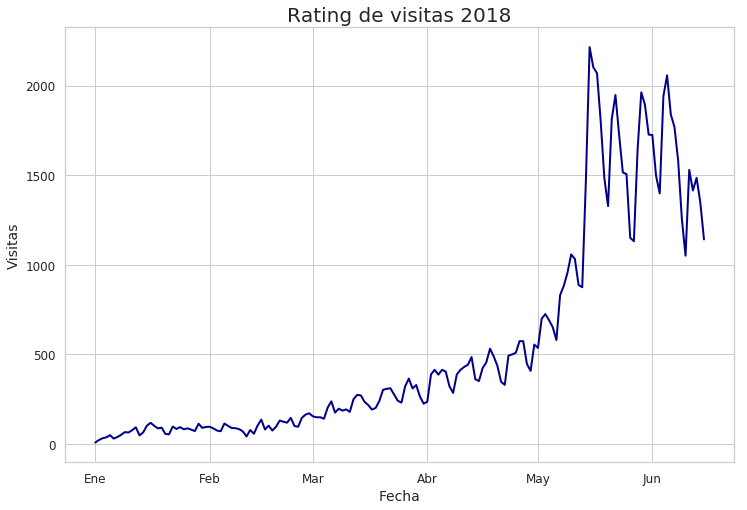

In [10]:
plt.figure()
g1 = visitas_por_dia.plot(kind='line', color={'darkblue'},linewidth=2,figsize=(12,8),title='Rating de visitas 2018',
                          legend=False,fontsize=12)
g1.set_xlabel("Fecha",fontsize=14)
g1.set_ylabel("Visitas",fontsize=14)
x_lab=['Ene','Feb','Mar','Abr','May','Jun']
g1.set_xticklabels(x_lab)
g1.title.set_size(20)
fig = g1.get_figure()
fig.savefig('rating.jpg')



# Cantidad y proporción de conversiones a lo largo del tiempo

In [11]:
def converted (row):
   if row['event'] == 'conversion':
      return 1
   return 0

In [12]:
df_visitas["conversiones"] = df.apply(lambda row: converted (row),axis=1)


In [13]:
visitas_por_dia["conversiones"] = df_visitas.groupby(["just_date"]).agg({'conversiones':'sum'})

In [14]:
visitas_por_dia.head(50)

,visitas,conversiones
just_date,,
2018-01-01,8,0
2018-01-02,22,0
2018-01-03,32,0
2018-01-04,37,2
2018-01-05,49,3
2018-01-06,30,0
2018-01-07,39,2
2018-01-08,51,3
2018-01-09,66,3


<Figure size 432x288 with 0 Axes>

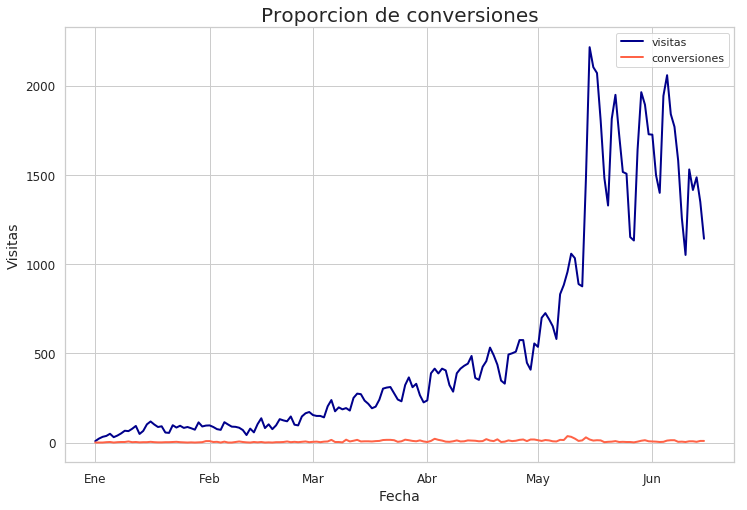

In [15]:
plt.figure()
g2 = visitas_por_dia.plot(kind='line',color={'darkblue','tomato'}, linewidth=2,figsize=(12,8),title='Proporcion de conversiones',
                          legend=True,fontsize=12)
g2.set_xlabel("Fecha",fontsize=14)
g2.set_ylabel("Visitas",fontsize=14)
x_lab=['Ene','Feb','Mar','Abr','May','Jun']
g2.set_xticklabels(x_lab)
g2.title.set_size(20)
fig = g2.get_figure()
fig.savefig('prop_conversiones.jpg')

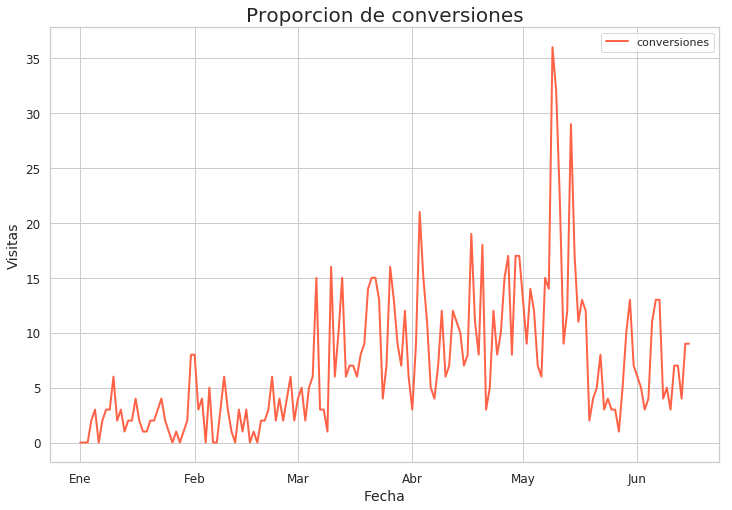

In [16]:
plt.figure()
g3 = visitas_por_dia["conversiones"].plot(kind='line',color='tomato',linewidth=2,figsize=(12,8),title='Proporcion de conversiones',
                          legend=True,fontsize=12)
g3.set_xlabel("Fecha",fontsize=14)
g3.set_ylabel("Visitas",fontsize=14)
x_lab=['Ene','Feb','Mar','Abr','May','Jun']
g3.set_xticklabels(x_lab)
g3.title.set_size(20)
fig = g3.get_figure()
fig.savefig('conversiones.jpg')


# Cantidad de visitas de un usuario por dia

In [17]:
df_cant_visitas =visitas_por_persona_por_dia["visitas"].value_counts().to_frame()

In [18]:
df_cant_visitas.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 13, 42, 35], dtype='int64')

In [19]:
df_cant_visitas=df_cant_visitas.transpose()
df_cant_visitas

,1,2,3,4,5,6,7,8,9,10,11,12,14,13,42,35
visitas,52767,9763,2822,1003,364,159,71,44,24,21,6,4,3,3,1,1


Unifico los grupos de visitas de mas de 5 veces por día para tener un numero representativo

In [20]:
v =  [5, 6, 7, 8, 9, 10, 11, 12, 14, 13, 42, 35]

In [21]:
def sumar_cols(data,vector):
    columna = 0
    for i in vector:
        columna = columna + data[i]
        del data[i]
    return columna

In [22]:
df_cant_visitas['+5']=sumar_cols(df_cant_visitas,v)

In [23]:
df_cant_visitas

,1,2,3,4,+5
visitas,52767,9763,2822,1003,701


Quiero analizar los eventos ocurridos para cada subconjunto (para los de visitas unicas por dia, 2 visitas por dia, 3,4,+5). 

In [24]:
df_eventos_visitas = pd.merge(visitas_por_persona_por_dia,df_visitas, on=['person','just_date'], how='inner').rename(index=str, columns={"visitas_x": "visitas"})


In [25]:
ct = pd.crosstab(df_eventos_visitas.event, df_eventos_visitas.visitas)

In [26]:
ct

visitas,1,2,3,4,5,6,7,8,9,10,11,12,13,14,35,42
event,,,,,,,,,,,,,,,,
ad campaign hit,54264,17171,6422,2840,1123,594,205,76,75,34,13,4,1,3,1,1
brand listing,58316,22403,9472,4538,1627,908,453,284,129,188,66,121,45,47,15,23
checkout,27095,4095,1407,599,289,136,66,27,6,10,0,1,1,2,0,1
conversion,580,232,149,89,62,29,15,11,2,3,0,0,0,0,0,0
generic listing,40919,14676,5913,2893,1314,680,371,204,243,169,60,44,40,2,1,5
lead,224,84,57,31,31,10,6,4,1,0,0,0,0,0,0,0
search engine hit,34876,9892,3478,1564,539,296,175,70,23,27,9,4,2,1,1,0
searched products,32475,12679,5768,2844,1110,673,205,180,73,27,15,9,10,5,0,0
staticpage,1611,825,534,244,177,98,44,29,13,13,0,7,3,0,0,0


Unifico de la misma forma que antes esta tabla

In [27]:
ct['+5']=sumar_cols(ct,v)


In [28]:
ct

visitas,1,2,3,4,+5
event,,,,,
ad campaign hit,54264,17171,6422,2840,2130
brand listing,58316,22403,9472,4538,3906
checkout,27095,4095,1407,599,539
conversion,580,232,149,89,122
generic listing,40919,14676,5913,2893,3133
lead,224,84,57,31,52
search engine hit,34876,9892,3478,1564,1147
searched products,32475,12679,5768,2844,2307
staticpage,1611,825,534,244,384


Para poder realizar un analisis porcentual, divido los valores de la columna segun la cantidad de visitas dada por "df_cant_visitas".

In [29]:
def porcentual(data,inicio,fin,total):
    for i in range(inicio,fin):
        data[i] = (data[i]/total[i])*100
    return

In [30]:
porcentual(ct,1,5,df_cant_visitas.loc["visitas"])
ct['+5']=ct['+5']/df_cant_visitas.loc["visitas"]['+5']*100
ct=ct.round(1)

In [31]:
ct

visitas,1,2,3,4,+5
event,,,,,
ad campaign hit,102.8,175.9,227.6,283.2,303.9
brand listing,110.5,229.5,335.6,452.4,557.2
checkout,51.3,41.9,49.9,59.7,76.9
conversion,1.1,2.4,5.3,8.9,17.4
generic listing,77.5,150.3,209.5,288.4,446.9
lead,0.4,0.9,2.0,3.1,7.4
search engine hit,66.1,101.3,123.2,155.9,163.6
searched products,61.5,129.9,204.4,283.5,329.1
staticpage,3.1,8.5,18.9,24.3,54.8


In [32]:
ct=ct.reset_index()
event=ct["event"]

Procedo a normalizar las filas para realizar un analisis porcentual entre las mismas. Para ello se necesita calcular la suma de cada una: 'total'

In [33]:
ct['total']=ct[1]+ct[2]+ct[3]+ct[4]+ct['+5']

In [34]:
ct

visitas,event,1,2,3,4,+5,total
0,ad campaign hit,102.8,175.9,227.6,283.2,303.9,1093.4
1,brand listing,110.5,229.5,335.6,452.4,557.2,1685.2
2,checkout,51.3,41.9,49.9,59.7,76.9,279.7
3,conversion,1.1,2.4,5.3,8.9,17.4,35.1
4,generic listing,77.5,150.3,209.5,288.4,446.9,1172.6
5,lead,0.4,0.9,2.0,3.1,7.4,13.8
6,search engine hit,66.1,101.3,123.2,155.9,163.6,610.1
7,searched products,61.5,129.9,204.4,283.5,329.1,1008.4
8,staticpage,3.1,8.5,18.9,24.3,54.8,109.6
9,viewed product,594.2,1221.3,1811.2,2355.6,3054.4,9036.7


In [35]:
def normalizar_filas(data,inicio_f,fin_f,inicio_c,fin_c):
    for i in range (inicio_f,fin_f):
        for j in range(inicio_c,fin_c):
            data.transpose()[i][j]=data.transpose()[i][j]/data.transpose()[i]['total']
    return

In [36]:
ct=ct.rename(index=str, columns={"+5": 5})
ct.index=[0,1,2,3,4,5,6,7,8,9,10]
ct=ct.drop(["event"],axis=1)
normalizar_filas(ct,0,11,1,6)
ct.index=event
ct=ct.drop(["total"],axis=1)
ct=ct.rename(index=str, columns={5: "+5"})

In [37]:
ct

visitas,1,2,3,4,+5
event,,,,,
ad campaign hit,0.094019,0.160874,0.208158,0.259009,0.277940
brand listing,0.065571,0.136186,0.199146,0.268455,0.330643
checkout,0.183411,0.149803,0.178405,0.213443,0.274937
conversion,0.031339,0.068376,0.150997,0.253561,0.495726
generic listing,0.066092,0.128177,0.178663,0.245949,0.381119
lead,0.028986,0.065217,0.144928,0.224638,0.536232
search engine hit,0.108343,0.166038,0.201934,0.255532,0.268153
searched products,0.060988,0.128818,0.202697,0.281138,0.326359
staticpage,0.028285,0.077555,0.172445,0.221715,0.500000


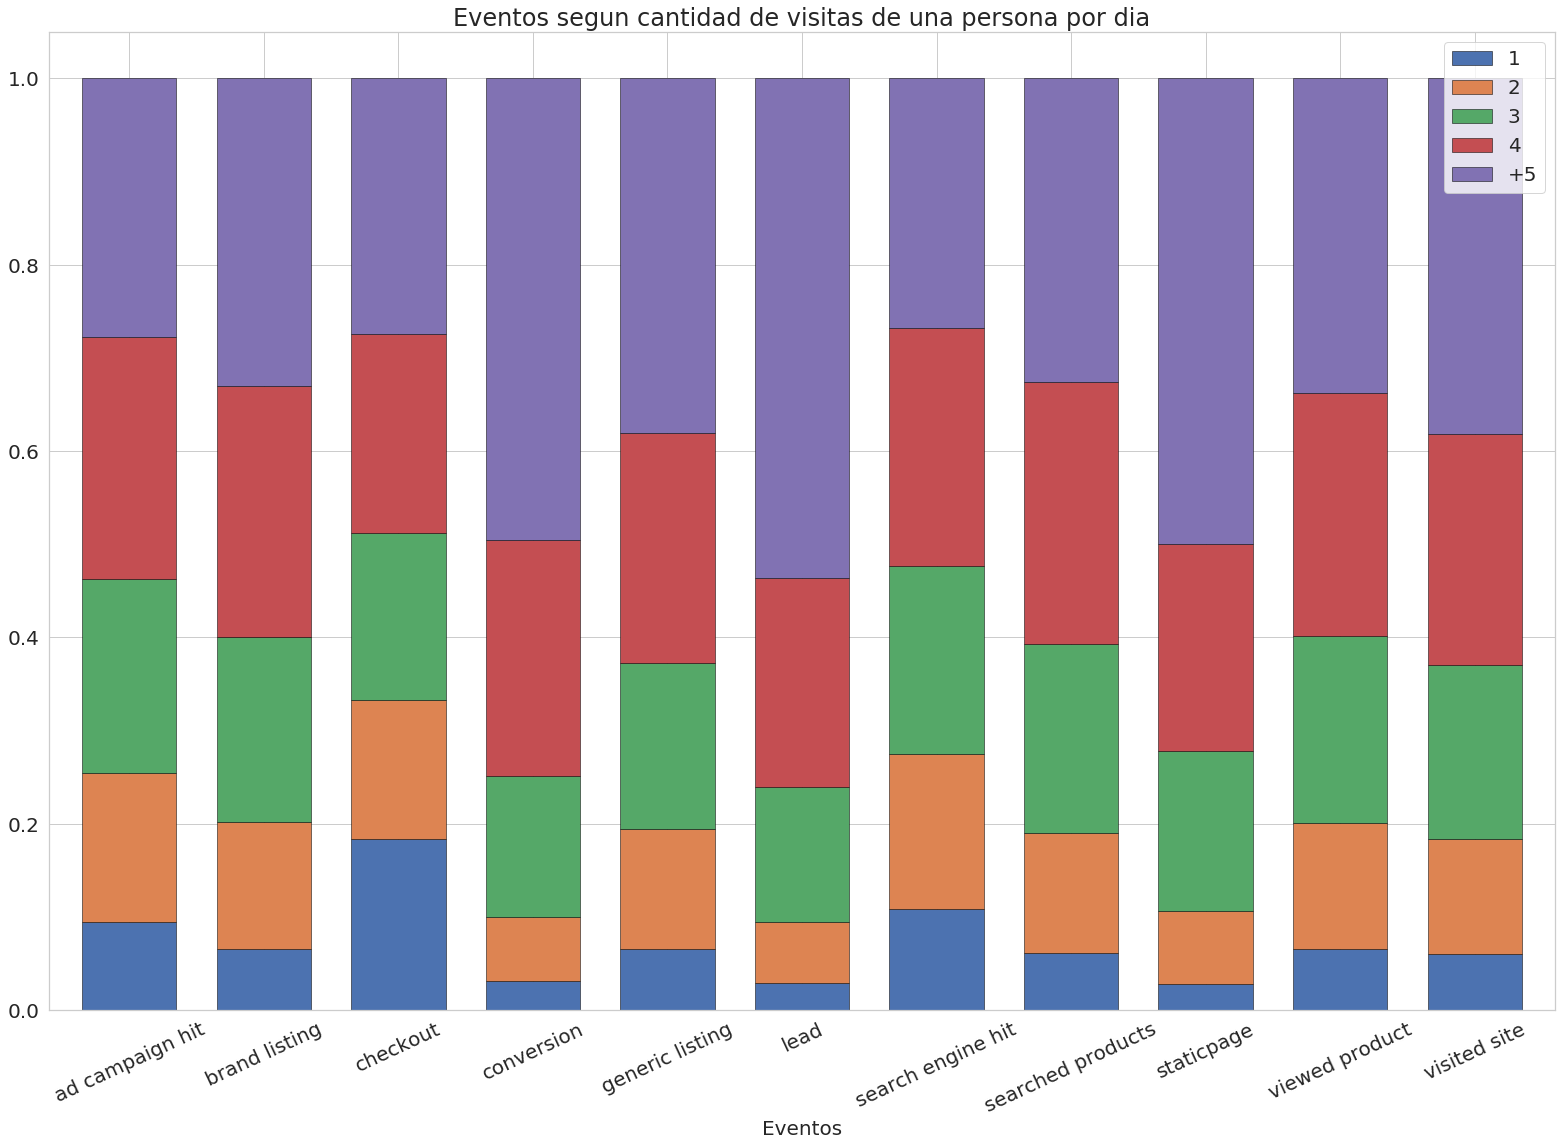

In [38]:
g4 = ct.plot(kind='bar', stacked=True,title='Eventos segun cantidad de visitas de una persona por dia', edgecolor='black', rot=25, linewidth=0.5, width=0.7, figsize=(27,18), fontsize=20)
g4.set_xlabel("Eventos",fontsize=20)
g4.title.set_size(24)
g4.legend(loc='best', prop={'size': 20})
fig = g4.get_figure()
fig.savefig('eventos_por_cant_visitas.jpg')


# Comportamiento del usuario segun la cantidad de visitas por mes

Procedo de forma similar al inciso anterior, pero esta vez agrupando por cantidad de visitas por mes

In [39]:
df_visitas['just_month'] = df_visitas['timestamp'].dt.month

In [40]:
visitas_por_persona_por_dia=visitas_por_persona_por_dia.reset_index()

In [41]:
visitas_por_persona_por_dia['just_date'] = pd.to_datetime(visitas_por_persona_por_dia['just_date'])
visitas_por_persona_por_dia["just_month"] = visitas_por_persona_por_dia['just_date'].dt.month


In [42]:
visitas_por_persona_por_dia.head(25)

,person,just_date,visitas,just_month
0,0004b0a2,2018-05-31,1,5
1,0006a21a,2018-05-29,1,5
2,000a54b2,2018-04-09,1,4
3,000a54b2,2018-05-24,1,5
4,00184bf9,2018-04-06,1,4
5,00184bf9,2018-05-04,1,5
6,00184bf9,2018-05-17,1,5
7,0019c395,2018-05-17,1,5
8,001bb7eb,2018-06-06,1,6
9,001bb7eb,2018-06-08,1,6


In [43]:
visitas_por_persona_por_mes = visitas_por_persona_por_dia.groupby(["person","just_month"]).agg({'visitas':'sum'})

In [44]:
visitas_por_persona_por_mes.head(25)

visitas
person   just_month         
0004b0a2 5                 1
0006a21a 5                 1
000a54b2 4                 1
         5                 1
00184bf9 4                 1
         5                 2
0019c395 5                 1
001bb7eb 6                 2
001f1653 5                 1
00204059 1                 2
         2                 9
         3                 1
         5                 1
0020f73c 6                 1
0024a82b 5                 1
0024ad28 5                 3
00269e77 5                 1
         6                 3
0026fd72 6                 2
0027c344 6                 3
00283a9e 6                 2
002932b1 5                 4
002cecfa 5                 1
002f3084 6                 1
00300ace 5                 2

In [45]:
df_cant_visitas_mes =visitas_por_persona_por_mes["visitas"].value_counts().to_frame()

In [46]:
df_cant_visitas_mes=df_cant_visitas_mes.sort_index(axis=0)

In [47]:
df_cant_visitas_mes.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 56, 62, 63, 64, 67, 68, 69, 70, 71, 73, 76, 79, 81, 85, 90, 101, 119, 144], dtype='int64')

In [48]:
df_cant_visitas_mes=df_cant_visitas_mes.transpose()

In [49]:
df_cant_visitas_mes.transpose()

,visitas
1,21795
2,5554
3,2620
4,1532
5,1004
6,655
7,468
8,348
9,277
10,236


In [50]:
v1= [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
v2= [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,30]
v3 = [31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 56] 
v4 = [62, 63, 64, 67, 68, 69, 70, 71, 73, 76, 79, 81, 85, 90, 101, 119, 144]


In [51]:
df_cant_visitas_mes['3-15']=sumar_cols(df_cant_visitas_mes,v1)
df_cant_visitas_mes['16-30']=sumar_cols(df_cant_visitas_mes,v2)
df_cant_visitas_mes['31-60']=sumar_cols(df_cant_visitas_mes,v3)
df_cant_visitas_mes['+61']=sumar_cols(df_cant_visitas_mes,v4)


In [52]:
df_cant_visitas_mes

,1,2,3-15,16-30,31-60,+61
visitas,21795,5554,7764,426,102,21


In [53]:
df_eventos_visitas_por_mes = pd.merge(visitas_por_persona_por_mes,df_visitas, on=['person','just_month'], how='inner').rename(index=str, columns={"visitas_x": "visitas"})


In [54]:
ct_mes = pd.crosstab(df_eventos_visitas_por_mes.event, df_eventos_visitas_por_mes.visitas)

In [55]:
ct_mes

visitas,1,2,3,4,5,6,7,8,9,10,11,...,70,71,73,76,79,81,85,90,101,119,144
event,,,,,,,,,,,,,,,,,,,,,,,
ad campaign hit,23183,11962,8001,5889,4861,3716,3080,2344,2215,2255,1879,...,0,31,0,25,6,15,9,4,46,40,19
brand listing,20704,13396,9485,7310,6170,4882,4113,3059,2327,2217,2599,...,0,1,10,194,1,31,0,7,12,469,311
checkout,18981,4674,2280,1437,1010,791,554,458,332,434,326,...,2,4,2,1,3,6,8,7,18,11,2
conversion,186,101,63,76,66,51,49,38,50,48,36,...,0,0,0,1,1,1,0,0,1,5,1
generic listing,16406,9189,6236,4844,3845,2979,2533,2025,1628,1674,1418,...,56,91,96,126,0,39,1,100,88,178,246
lead,58,45,25,23,20,30,28,11,14,5,12,...,0,0,0,1,0,0,0,0,0,0,0
search engine hit,17175,8267,5355,3737,2692,2086,1581,1207,1027,1102,775,...,0,1,1,10,0,14,6,0,18,6,0
searched products,12705,7680,6193,4594,3743,3074,2130,1629,1393,1460,1257,...,9,125,92,4,0,10,44,50,5,34,53
staticpage,533,392,275,212,173,154,96,108,118,103,89,...,5,1,20,20,1,6,5,1,11,8,6


In [56]:
ct_mes['3-15']=sumar_cols(ct_mes,v1)
ct_mes['16-30']=sumar_cols(ct_mes,v2)
ct_mes['31-60']=sumar_cols(ct_mes,v3)
ct_mes['+61']=sumar_cols(ct_mes,v4)

In [57]:
ct_mes

visitas,1,2,3-15,16-30,31-60,+61
event,,,,,,
ad campaign hit,23183,11962,38691,6237,2252,502
brand listing,20704,13396,48438,10051,4066,1980
checkout,18981,4674,8455,1135,388,102
conversion,186,101,591,209,64,21
generic listing,16406,9189,31413,6393,2604,1529
lead,58,45,217,82,44,2
search engine hit,17175,8267,21923,2588,844,160
searched products,12705,7680,29449,4465,1190,584
staticpage,533,392,1631,591,317,134


In [58]:
ct_mes=ct_mes.rename(index=str, columns={"3-15": 3, "16-30":4,"31-60":5,"+61":6})
df_cant_visitas_mes=df_cant_visitas_mes.rename(index=str, columns={"3-15": 3, "16-30":4,"31-60":5,"+61":6})
porcentual(ct_mes,1,7,df_cant_visitas_mes.loc["visitas"])
ct_mes=ct_mes.round(1)

In [59]:
ct_mes

visitas,1,2,3,4,5,6
event,,,,,,
ad campaign hit,106.4,215.4,498.3,1464.1,2207.8,2390.5
brand listing,95.0,241.2,623.9,2359.4,3986.3,9428.6
checkout,87.1,84.2,108.9,266.4,380.4,485.7
conversion,0.9,1.8,7.6,49.1,62.7,100.0
generic listing,75.3,165.4,404.6,1500.7,2552.9,7281.0
lead,0.3,0.8,2.8,19.2,43.1,9.5
search engine hit,78.8,148.8,282.4,607.5,827.5,761.9
searched products,58.3,138.3,379.3,1048.1,1166.7,2781.0
staticpage,2.4,7.1,21.0,138.7,310.8,638.1


In [60]:
ct_mes=ct_mes.reset_index()
event=ct_mes["event"]
ct_mes['total']=ct_mes[1]+ct_mes[2]+ct_mes[3]+ct_mes[4]+ct_mes[5]+ct_mes[6]

In [61]:
ct_mes

visitas,event,1,2,3,4,5,6,total
0,ad campaign hit,106.4,215.4,498.3,1464.1,2207.8,2390.5,6882.5
1,brand listing,95.0,241.2,623.9,2359.4,3986.3,9428.6,16734.4
2,checkout,87.1,84.2,108.9,266.4,380.4,485.7,1412.7
3,conversion,0.9,1.8,7.6,49.1,62.7,100.0,222.1
4,generic listing,75.3,165.4,404.6,1500.7,2552.9,7281.0,11979.9
5,lead,0.3,0.8,2.8,19.2,43.1,9.5,75.7
6,search engine hit,78.8,148.8,282.4,607.5,827.5,761.9,2706.9
7,searched products,58.3,138.3,379.3,1048.1,1166.7,2781.0,5571.7
8,staticpage,2.4,7.1,21.0,138.7,310.8,638.1,1118.1
9,viewed product,545.8,1251.3,3440.5,11088.7,19669.6,28871.4,64867.3


In [62]:
ct_mes.index=[0,1,2,3,4,5,6,7,8,9,10]
ct_mes=ct_mes.drop(["event"],axis=1)
normalizar_filas(ct_mes,0,11,1,7)
ct_mes.index=event
ct_mes=ct_mes.drop(["total"],axis=1)


In [63]:
ct_mes=ct_mes.rename(index=str, columns={3: "3-15", 4:"16-30",5:"31-60",6:"+61"})

In [64]:
ct_mes

visitas,1,2,3-15,16-30,31-60,+61
event,,,,,,
ad campaign hit,0.015459,0.031297,0.072401,0.212728,0.320785,0.347330
brand listing,0.005677,0.014413,0.037282,0.140991,0.238210,0.563426
checkout,0.061655,0.059602,0.077086,0.188575,0.269272,0.343810
conversion,0.004052,0.008104,0.034219,0.221072,0.282305,0.450248
generic listing,0.006286,0.013806,0.033773,0.125268,0.213099,0.607768
lead,0.003963,0.010568,0.036988,0.253633,0.569353,0.125495
search engine hit,0.029111,0.054971,0.104326,0.224426,0.305700,0.281466
searched products,0.010464,0.024822,0.068076,0.188111,0.209397,0.499130
staticpage,0.002146,0.006350,0.018782,0.124050,0.277972,0.570700


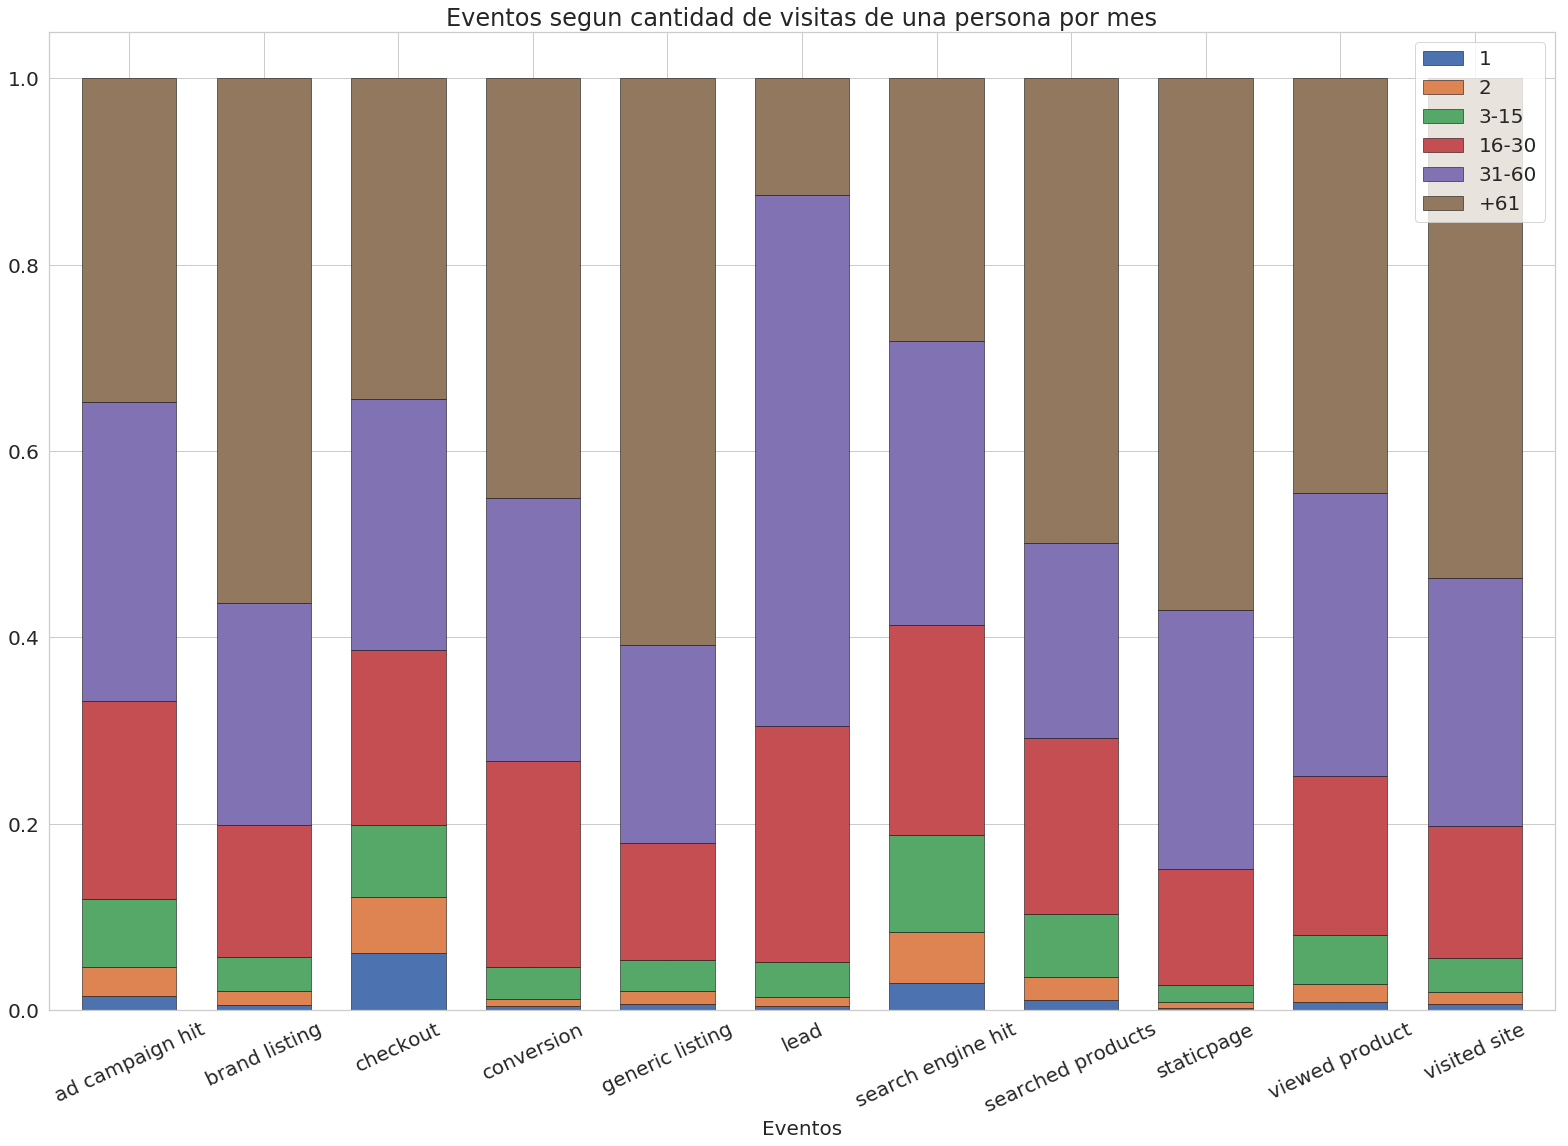

In [65]:
g5 = ct_mes.plot(kind='bar', stacked=True,title='Eventos segun cantidad de visitas de una persona por mes', edgecolor='black', rot=25, linewidth=0.5, width=0.7, figsize=(27,18), fontsize=20)
g5.set_xlabel("Eventos",fontsize=20)
g5.title.set_size(24)
g5.legend(loc='best', prop={'size': 20})
fig = g5.get_figure()
fig.savefig('eventos_por_cant_visitas_por_mes.jpg')